In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm import tqdm

In [43]:
from keras.preprocessing.image import load_img

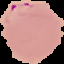

In [44]:
load_img('/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png', target_size=(64,64))

In [45]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [46]:
img_dir = '/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/'
dataset = []
labels = []
size = 64

In [47]:
# Parasitized Images
parasitised_img = os.listdir(img_dir + 'Parasitized/')

for i, img_name in enumerate(tqdm(parasitised_img)):
    if img_name.split('.')[1] == 'png':
        image = cv2.imread(img_dir + 'Parasitized/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(image)
        labels.append(0)

100%|██████████| 13800/13800 [00:40<00:00, 343.51it/s]


In [48]:
# Uninfected Images
uninfected_img = os.listdir(img_dir + 'Uninfected/')

for i, img_name in enumerate(tqdm(uninfected_img)):
    if img_name.split('.')[1] == 'png':
        image = cv2.imread(img_dir + 'Uninfected/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(image)
        labels.append(1)

100%|██████████| 4133/4133 [00:11<00:00, 364.29it/s]


In [49]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(labels)), test_size= 0.2, random_state = 0)

In [54]:
input_shape = (size,size,3)
inp = k.Input(shape = input_shape)

conv1 = k.Conv2D(32,kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = k.MaxPool2D(pool_size = (2,2),)(conv1)
norm1 = k.BatchNormalization(axis = 1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32,kernel_size = (3,3), activation = 'relu', padding = 'same')(conv1)
pool2 = k.MaxPool2D(pool_size = (2,2),)(conv2)
norm2 = k.BatchNormalization(axis = 1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

conv3 = k.Conv2D(32,kernel_size = (3,3), activation = 'relu', padding = 'same')(conv2)
pool3 = k.MaxPool2D(pool_size = (2,2),)(conv3)
norm3 = k.BatchNormalization(axis = -1)(pool3)
drop3 = k.Dropout(rate = 0.2)(norm3)

flat = k.Flatten()(drop3)

hidden1 = k.Dense(512, activation = 'relu')(flat)
norm4 = k.BatchNormalization(axis = -1)(hidden1)
drop4 = k.Dropout(rate = 0.2)(norm4)

hidden2 = k.Dense(256, activation = 'relu')(drop4)
norm5 = k.BatchNormalization(axis = -1)(hidden2)
drop5 = k.Dropout(rate = 0.2)(norm5)

hidden3 = k.Dense(128, activation = 'relu')(drop4)
norm6 = k.BatchNormalization(axis = -1)(hidden3)
drop6 = k.Dropout(rate = 0.2)(norm6)

out = k.Dense(2, activation = 'sigmoid')(drop6)

In [55]:
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,865,730 (64.34 MB)

 Trainable params: 16,864,386 (64.33 MB)

 Non-trainable params: 1,344 (5.25 KB)

None


In [56]:
history = model.fit(np.array(xtrain), ytrain, batch_size = 64, epochs = 25, validation_split = 0.1, shuffle = False)

Epoch 1/25
 15/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5460 - loss: 1.0662

W0000 00:00:1716457411.048859     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6640 - loss: 0.7020

W0000 00:00:1716457418.657661     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


202/202 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6642 - loss: 0.7015 - val_accuracy: 0.2767 - val_loss: 2.8518
Epoch 2/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7669 - loss: 0.5074 - val_accuracy: 0.7972 - val_loss: 0.4520
Epoch 3/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7827 - loss: 0.4749 - val_accuracy: 0.3540 - val_loss: 2.5254
Epoch 4/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7846 - loss: 0.4768 - val_accuracy: 0.6467 - val_loss: 0.7775
Epoch 5/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8146 - loss: 0.4209 - val_accuracy: 0.7659 - val_loss: 0.7543
Epoch 6/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8318 - loss: 0.3775 - val_accuracy: 0.2488 - val_loss: 7.9870
Epoch 7/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8126 - loss: 0.4249 - val_accuracy: 0.8307 - val_loss: 0.3855
Epoch 8/25
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8161 - loss: 0.4077 - val_accuracy: 0.84

In [58]:
print("Test accuracy: {:.2f}%".format(model.evaluate(np.array(xtest),np.array(ytest))[1]*100))

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3168
Test accuracy: 87.68%
